## Load Stuff

In [1]:
import torch
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

### Load Model

In [2]:
mario_lm = MarioLM()

Using shyamsn97/Mario-GPT2-700-context-length model


/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1177: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


### Load Dataset (Optional)

In [3]:
dataset = MarioDataset(mario_lm.tokenizer)

No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


#### View string representation of level

In [4]:
view_level(dataset.input_ids[:701], mario_lm.tokenizer)

['--------------------------------------------------Y',
 '--------------------------------------------------Y',
 '--------------------------------------------------Y',
 '--------------------------------------------------Y',
 '-------------------------------------------------oY',
 '--------XSSSSS---------------------------------SSSY',
 '--------X-----------------------------------------Y',
 '--------X-----------------------------------------Y',
 '-------EX--E-X---------------xxxx-?-----------xxxxY',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?Y',
 '---------------------------xx-[]--x---------xx----Y',
 '--------------------------xx--[]---x-------xx-----Y',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------Y',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXXX']

#### Image

##### Previewing the first 50 columns of the dataset

/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/Pillow-9.1.1-py3.9-linux-x86_64.egg/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


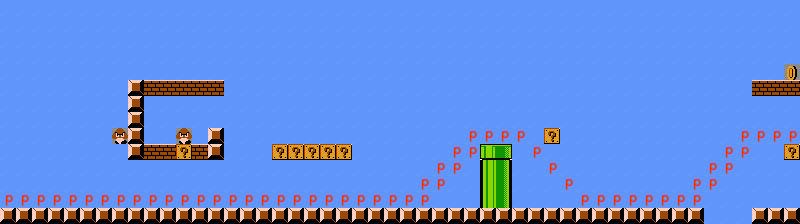

In [5]:
img = convert_level_to_png(dataset.input_ids[:700],  mario_lm.tokenizer)[0]
img

#### Set device

In [6]:
device = torch.device('cuda')
mario_lm = mario_lm.to(device)

## Generating Levels

In [45]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

##### We generate 1399 predictions for an even 1400 output (including the input seed which is just a single block). Mario Levels have height of 14, so we generate 100 columns. You don't have to worry about perfect dimensions, we'll trim the remainder for you!

In [53]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100%|█████| 1400/1400 [00:24<00:00, 56.47it/s]


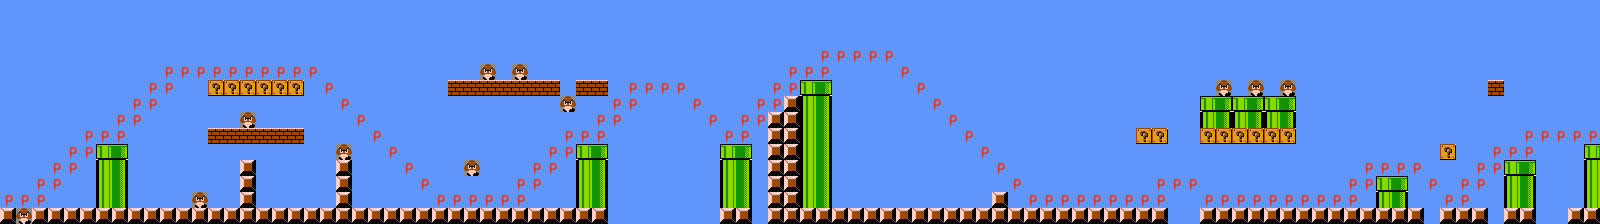

In [54]:
generated_level.img

#### Check if the model generated the correct level
##### Because of the stochastic nature of the model and the small training dataset, the model may generate levels that do not completely match the given prompt

In [56]:
generated_level.prompt

'many pipes, many enemies, some blocks, high elevation'

## Play Levels Interactively

In [57]:
generated_level.play()

Playing level interactively -- /tmp/tmpzy9m5ys7.txt!
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



KeyboardInterrupt



## Run Astar Agent

In [58]:
generated_level.run_astar()

Running Astar agent on level! -- /tmp/tmpck_qbx1c.txt
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Batch multiple prompts

In [72]:
prompts = ["no pipes, many enemies, some blocks, high elevation", "many pipes, no enemies, many blocks, high elevation", "many pipes, many enemies, little blocks, low elevation"]

generated_levels = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([3, 672]), torch.Size([3, 1401]) first: 56, last: 13: 100%|█████| 1400/1400 [01:01<00:00, 22.84it/s]


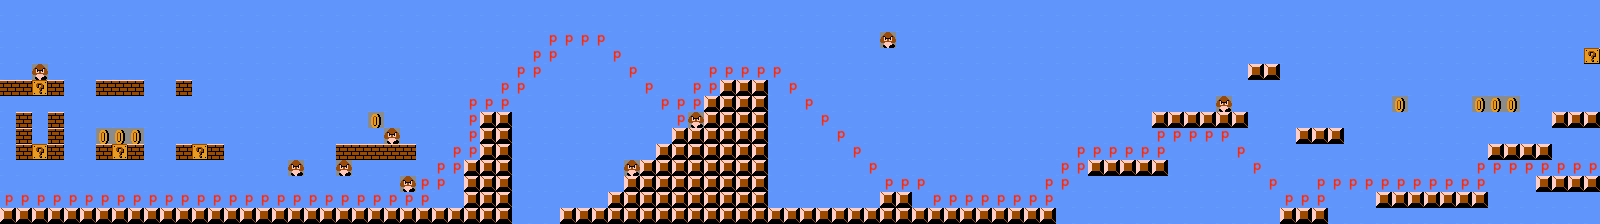

In [73]:
generated_levels[0].img

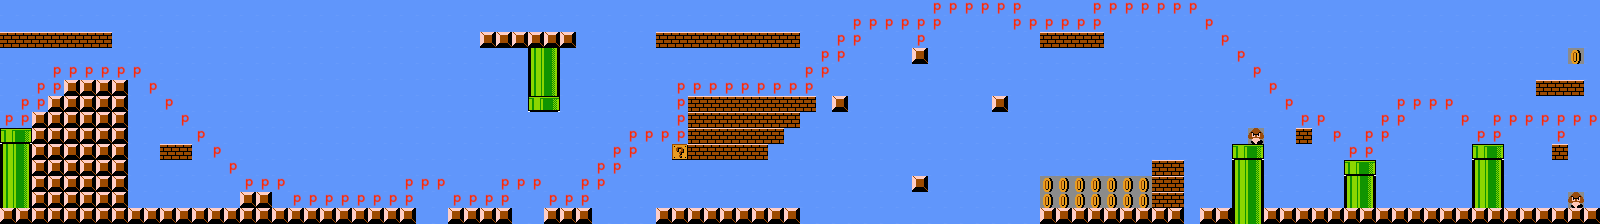

In [74]:
generated_levels[1].img

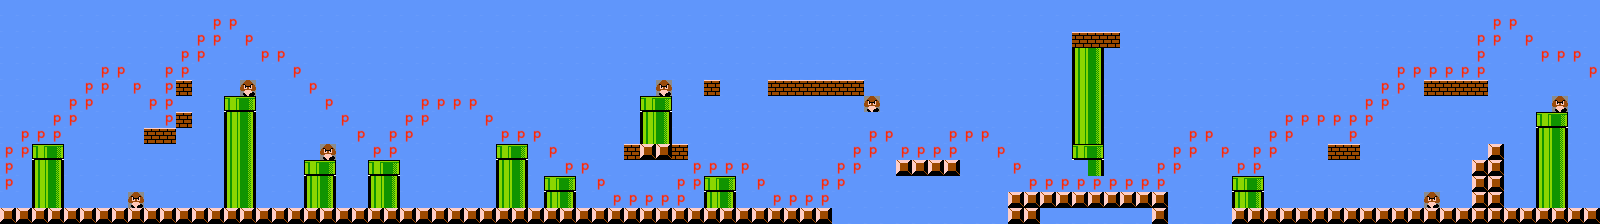

In [75]:
generated_levels[2].img

### Generate Timelapses

In [76]:
from mario_gpt.utils import generate_timelapse

In [79]:
timelapse_0 = generate_timelapse(generated_levels[0].level_tensor, mario_lm)

In [80]:
timelapse_1 = generate_timelapse(generated_levels[1].level_tensor, mario_lm)

In [81]:
timelapse_2 = generate_timelapse(generated_levels[2].level_tensor, mario_lm)

In [82]:
# save
# import imageio
# imageio.mimsave('timelapse_0.gif',timelapse_0,fps=60)